In [15]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy 

# Import the datetime module from the datetime library.
from datetime import datetime

In [16]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [17]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [18]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [19]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [20]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [21]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ossora
Processing Record 2 of Set 1 | alenquer
Processing Record 3 of Set 1 | ballina
Processing Record 4 of Set 1 | tuktoyaktuk
Processing Record 5 of Set 1 | novikovo
Processing Record 6 of Set 1 | kloulklubed
Processing Record 7 of Set 1 | miles city
Processing Record 8 of Set 1 | bengkulu
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | husavik
Processing Record 12 of Set 1 | souillac
Processing Record 13 of Set 1 | ilulissat
Processing Record 14 of Set 1 | christchurch
Processing Record 15 of Set 1 | lebu
Processing Record 16 of Set 1 | qaanaaq
Processing Record 17 of Set 1 | salcedo
Processing Record 18 of Set 1 | faanui
Processing Record 19 of Set 1 | kaili
Processing Record 20 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 21 of Set 1 | alta floresta
Processing Record 22 of Set 1 | punta arenas
Proc

Processing Record 38 of Set 4 | berlevag
Processing Record 39 of Set 4 | amderma
City not found. Skipping...
Processing Record 40 of Set 4 | malacacheta
Processing Record 41 of Set 4 | seljord
Processing Record 42 of Set 4 | kumluca
Processing Record 43 of Set 4 | lolua
City not found. Skipping...
Processing Record 44 of Set 4 | oranjemund
Processing Record 45 of Set 4 | henties bay
Processing Record 46 of Set 4 | gravdal
Processing Record 47 of Set 4 | guerrero negro
Processing Record 48 of Set 4 | ladario
Processing Record 49 of Set 4 | korla
Processing Record 50 of Set 4 | zhaotong
Processing Record 1 of Set 5 | auki
Processing Record 2 of Set 5 | beringovskiy
Processing Record 3 of Set 5 | meulaboh
Processing Record 4 of Set 5 | baixa grande
Processing Record 5 of Set 5 | xuddur
Processing Record 6 of Set 5 | atuona
Processing Record 7 of Set 5 | dongsheng
Processing Record 8 of Set 5 | nanortalik
Processing Record 9 of Set 5 | springbok
Processing Record 10 of Set 5 | pryazha
Proc

Processing Record 27 of Set 8 | paamiut
Processing Record 28 of Set 8 | oktyabrskoye
Processing Record 29 of Set 8 | borogontsy
Processing Record 30 of Set 8 | port hardy
Processing Record 31 of Set 8 | ust-tsilma
Processing Record 32 of Set 8 | balkanabat
Processing Record 33 of Set 8 | hofn
Processing Record 34 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 35 of Set 8 | clyde river
Processing Record 36 of Set 8 | morristown
Processing Record 37 of Set 8 | masalli
Processing Record 38 of Set 8 | a
City not found. Skipping...
Processing Record 39 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 40 of Set 8 | port augusta
Processing Record 41 of Set 8 | cockburn town
Processing Record 42 of Set 8 | alekseyevsk
Processing Record 43 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 44 of Set 8 | vao
Processing Record 45 of Set 8 | khonuu
City not found. Skipping...
Processing Record 46 of Set 8 | vaitupu
City not found. Skipping.

Processing Record 10 of Set 12 | priekule
Processing Record 11 of Set 12 | bandarbeyla
Processing Record 12 of Set 12 | te anau
Processing Record 13 of Set 12 | mathathane
Processing Record 14 of Set 12 | acaponeta
Processing Record 15 of Set 12 | salamiyah
Processing Record 16 of Set 12 | ulladulla
Processing Record 17 of Set 12 | ciucsangeorgiu
Processing Record 18 of Set 12 | lexington
Processing Record 19 of Set 12 | ushtobe
Processing Record 20 of Set 12 | nuevo progreso
Processing Record 21 of Set 12 | bozova
Processing Record 22 of Set 12 | westport
Processing Record 23 of Set 12 | moses lake
Processing Record 24 of Set 12 | zambezi
Processing Record 25 of Set 12 | verkh-suetka
Processing Record 26 of Set 12 | kijang
Processing Record 27 of Set 12 | namibe
Processing Record 28 of Set 12 | synya
Processing Record 29 of Set 12 | novyy urengoy
Processing Record 30 of Set 12 | morondava
Processing Record 31 of Set 12 | kuryk
Processing Record 32 of Set 12 | stephenville
Processing R

In [22]:
len(city_data)

563

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ossora,59.2353,163.0719,3.97,84,100,5.88,RU,2021-04-12 15:59:18
1,Alenquer,-1.9417,-54.7383,86.00,74,20,11.50,BR,2021-04-12 15:59:19
2,Ballina,-28.8667,153.5667,53.60,94,40,6.29,AU,2021-04-12 15:59:19
3,Tuktoyaktuk,69.4541,-133.0374,-13.00,70,40,4.61,CA,2021-04-12 15:59:19
4,Novikovo,51.1537,37.8879,64.02,48,29,11.61,RU,2021-04-12 15:59:20
5,Kloulklubed,7.0419,134.2556,78.80,89,90,5.75,PW,2021-04-12 15:59:20
6,Miles City,46.4083,-105.8406,32.00,59,90,25.32,US,2021-04-12 15:59:21
7,Bengkulu,-3.8004,102.2655,76.46,88,97,4.41,ID,2021-04-12 15:54:33
8,Georgetown,5.4112,100.3354,82.40,89,20,2.30,MY,2021-04-12 15:59:15
9,Jamestown,42.0970,-79.2353,55.00,76,90,5.75,US,2021-04-12 15:56:20


In [24]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [25]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ossora,RU,2021-04-12 15:59:18,59.2353,163.0719,3.97,84,100,5.88
1,Alenquer,BR,2021-04-12 15:59:19,-1.9417,-54.7383,86.00,74,20,11.50
2,Ballina,AU,2021-04-12 15:59:19,-28.8667,153.5667,53.60,94,40,6.29
3,Tuktoyaktuk,CA,2021-04-12 15:59:19,69.4541,-133.0374,-13.00,70,40,4.61
4,Novikovo,RU,2021-04-12 15:59:20,51.1537,37.8879,64.02,48,29,11.61


In [27]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [29]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1618244321.983623

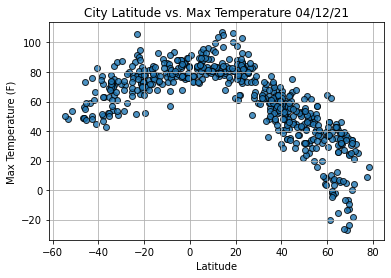

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

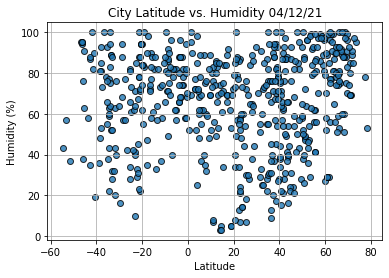

In [31]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

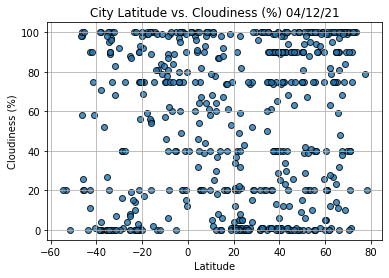

In [32]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

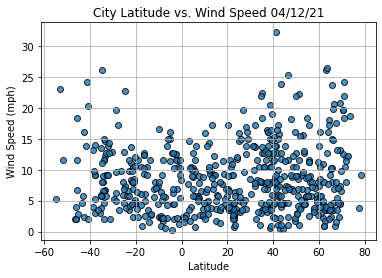

In [33]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()